<a href="https://colab.research.google.com/github/aadi-29/machinelearning/blob/main/Maximum_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clean(Clump Thickness, 2) = 0.3968310262370867
Clean(Clump Thickness, 3) = 0.3779852955818621
Clean(Clump Thickness, 4) = 0.33005446467393523
Clean(Clump Thickness, 5) = 0.2830726740872174
Clean(Clump Thickness, 6) = 0.23854012302948574
Clean(Clump Thickness, 7) = 0.23657213566906413
Clean(Clump Thickness, 8) = 0.27544764362915136
Clean(Clump Thickness, 9) = 0.33612024599149054
Clean(Clump Thickness, 10) = 0.35777187365170204
Clean(Uniformity of Cell Size, 2) = 0.17923904898153825
Clean(Uniformity of Cell Size, 3) = 0.1328709863759936
Clean(Uniformity of Cell Size, 4) = 0.13520676276119817
Clean(Uniformity of Cell Size, 5) = 0.18307385018189754
Clean(Uniformity of Cell Size, 6) = 0.24435179982643432
Clean(Uniformity of Cell Size, 7) = 0.28541024134558424
Clean(Uniformity of Cell Size, 8) = 0.313760448572352
Clean(Uniformity of Cell Size, 9) = 0.3558274699023903
Clean(Uniformity of Cell Size, 10) = 0.3607866572499593
Clean(Uniformity of Cell Shape, 2) = 0.21716473012737694
Clean(Uniform

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: The handle '_' has a label of '_' which cannot be automatically added to the legend.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/l

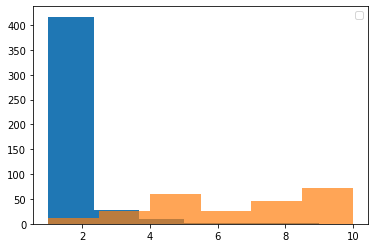

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

lables=["id","Clump Thickness","Uniformity of Cell Size","Uniformity of Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses","class_label"]
df= pd.read_csv(r"breast-cancer-wisconsin.csv", index_col=0, names=lables)
c=[]
df2=df.replace(to_replace ="?",value =-1)
df2=df2.astype(int)
for i in range(1,10):
    for j in range(2,11):
        s1=df2[(df2[lables[i]]<j) & (df2[lables[i]]>0)]
        s2=df2[df2[lables[i]]>=j]
        l1=[s1[s1["class_label"]==2].size, s1[s1["class_label"]==4].size]
        l2=[s2[s2["class_label"]==2].size, s2[s2["class_label"]==4].size]
        cs1=1-((l1[0]/(l1[0]+l1[1]))**2+(l1[1]/(l1[0]+l1[1]))**2)
        cs2=1-((l2[0]/(l2[0]+l2[1]))**2+(l2[1]/(l2[0]+l2[1]))**2)
        t=((s1.size*cs1)+(s2.size*cs2))/(s1.size+s2.size)
        c.append([t,lables[i],j])
        print("Clean("+str(lables[i])+", "+str(j)+") =",c[len(c)-1][0])
print("Maximum clean-ness value:","\n")
print(min(c),"\n")
m=min(c)
s11=df[df['class_label']==2]
s22=df[df['class_label']==4]
plt.hist(s11[m[1]],label="Single Epithelial Cell Size",bins=6)
plt.hist(s22[m[1]],label="Single Epithelial Cell Size",bins=6, alpha=0.7)
plt.legend("class_label_2","class_label_4")
plt.show()